## Testing the Model and Saving the returns, rewards and step_count

In [1]:
import torch
from torch import nn
from torchvision import transforms as T
from PIL import Image
import numpy as np
from pathlib import Path
from collections import deque
import random, datetime, os, copy

# Gym is an OpenAI toolkit for RL
import gym
from gym.spaces import Box
from gym.wrappers import FrameStack

# NES Emulator for OpenAI Gym
from nes_py.wrappers import JoypadSpace

# Super Mario environment for OpenAI Gym
import gym_super_mario_bros
from gym_super_mario_bros.actions import RIGHT_ONLY

#tqdm
import tqdm

import matplotlib.pyplot as plt
import time

In [ ]:
#Run DQN and DDQN for 100 episodes
if __name__ == '__main__':
    # create environment
    my_env = generate_env(gym_super_mario_bros.make('SuperMarioBros-1-1-v3', apply_api_compatibility=True))#, render_mode="human"))

    # create training parameters
    train_parameters = {
    'gamma' : 0.99,
    'lamda' : 0.95,
    'n_mini_batch' : 4,
    'epochs' : 30,
    'save_directory' : "./mario_ppo",
    'batch_size' : 4096,
    'visual' : True,
    'episodes' : 10,
}

    agent = DQNAgent(train_parameters)
    agent.load_model("./mario_dqn.path")

    gamma = 0.99
    step_list = []
    undisc_returns = []
    returns = []
    for i in range(1):
        state = my_env.reset()
        step_count = 0
        done = False
        ep_reward = []
        R = 0
        G = 0
        while not done:
            action = agent.get_action(state, 0.1)
            next_obs, reward, done, _, info = my_env.step(action)
            flag = info['flag_get']
            ep_reward.append(reward)
            step_count+= 1
            state = next_obs
        if flag:
            for r in reversed(ep_reward):
                R += r
                G  = r + gamma*G
            undisc_returns.append(R)
            returns.append(G)
            step_list.append(step_count)

    
    print(undisc_returns)
    print(returns)
    print(step_list)

In [4]:
import pickle

with open('returns_ddqn.pk1', 'rb') as file:
    ddqn_returns = pickle.load(file)

with open('returns_dqn.pk1', 'rb') as file:
    dqn_returns = pickle.load(file)

with open('returns_ppo.pkl', 'rb') as file:
    ppo_returns = pickle.load(file)

with open('rewards_ddqn.pk1', 'rb') as file:
    ddqn_rewards = pickle.load(file)

with open('rewards_dqn.pk1', 'rb') as file:
    dqn_rewards = pickle.load(file)

with open('rewards_ppo.pkl', 'rb') as file:
    ppo_rewards = pickle.load(file)

mean_returns_dqn = []
mean_returns_ddqn = []
mean_returns_ppo = []
mean_rewards_dqn = []
mean_rewards_ddqn = []
mean_rewards_ppo = []

for i in range(0, len(dqn_returns), 10):
    if i+1000 < len(dqn_returns):
        mean_returns_dqn.append(np.mean(np.array(dqn_returns[i: i+100])))
    else:
        mean_returns_dqn.append(np.mean(np.array(dqn_returns[i:])))

for i in range(0, len(ddqn_returns), 10):
    if i+1000 < len(ddqn_returns):
        mean_returns_ddqn.append(np.mean(np.array(ddqn_returns[i: i+100])))
    else:
        mean_returns_ddqn.append(np.mean(np.array(ddqn_returns[i:])))

for i in range(0, len(ppo_returns), 10):
    if i+1000 < len(ppo_returns):
        mean_returns_ppo.append(np.mean(np.array(ppo_returns[i: i+100])))
    else:
        mean_returns_ppo.append(np.mean(np.array(ppo_returns[i:])))

for i in range(0, len(dqn_rewards), 10):
    if i+1000 < len(dqn_rewards):
        mean_rewards_dqn.append(np.mean(np.array(dqn_rewards[i: i+100])))
    else:
        mean_rewards_dqn.append(np.mean(np.array(dqn_rewards[i:])))

for i in range(0, len(ddqn_rewards), 10):
    if i+1000 < len(ddqn_rewards):
        mean_rewards_ddqn.append(np.mean(np.array(ddqn_rewards[i: i+100])))
    else:
        mean_rewards_ddqn.append(np.mean(np.array(ddqn_rewards[i:])))

for i in range(0, len(ppo_rewards), 10):
    if i+1000 < len(ppo_rewards):
        mean_rewards_ppo.append(np.mean(np.array(ppo_rewards[i: i+100])))
    else:
        mean_rewards_ppo.append(np.mean(np.array(ppo_rewards[i:])))

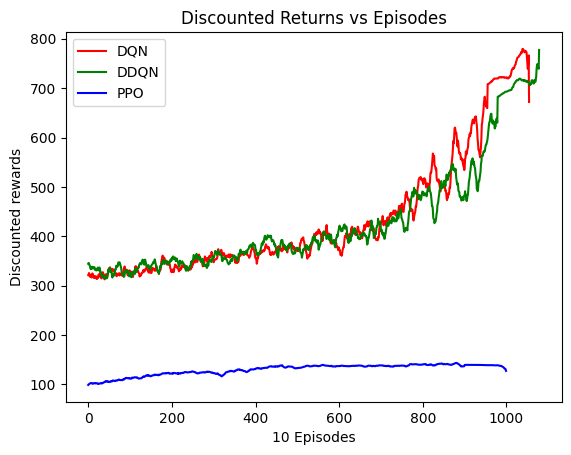

In [27]:
plt.plot(mean_returns_dqn, 'r')
plt.plot(mean_returns_ddqn, 'g')
plt.plot(mean_returns_ppo, 'b')
plt.legend(['DQN', 'DDQN', 'PPO'])
plt.xlabel('10 Episodes')
plt.ylabel("Discounted rewards")
plt.title('Discounted Returns vs Episodes')
plt.show()


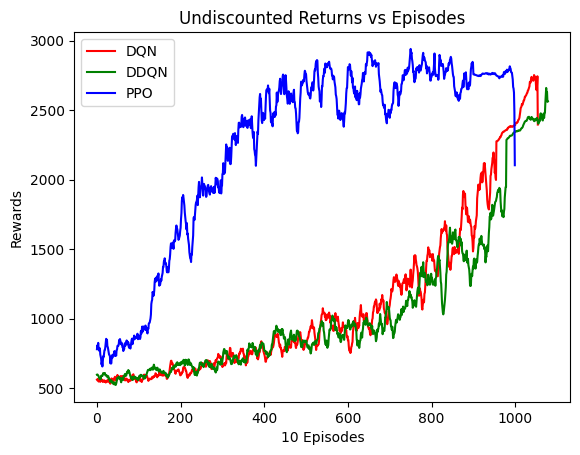

In [26]:
plt.plot(mean_rewards_dqn, 'r')
plt.plot(mean_rewards_ddqn, 'g')
plt.plot(mean_rewards_ppo, 'b')
plt.legend(['DQN', 'DDQN', 'PPO'])
plt.xlabel('10 Episodes')
plt.ylabel("Rewards")
plt.title('Undiscounted Returns vs Episodes')
plt.show()

In [7]:
import pickle

with open('trained_returns_ddqn.pk1', 'rb') as file:
    tr_ddqn_returns = pickle.load(file)

with open('trained_returns_dqn.pk1', 'rb') as file:
    tr_dqn_returns = pickle.load(file)

with open('trained_returns_ppo.pk1', 'rb') as file:
    tr_ppo_returns = pickle.load(file)

with open('undisc_trained_returns_ddqn.pk1', 'rb') as file:
    tr_ddqn_undisc_returns = pickle.load(file)

with open('undisc_trained_returns_dqn.pk1', 'rb') as file:
    tr_dqn_undisc_returns = pickle.load(file)

with open('undisc_trained_returns_ppo.pk1', 'rb') as file:
    tr_ppo_undisc_returns = pickle.load(file)

with open('step_count_ddqn.pk1', 'rb') as file:
    step_ddqn = pickle.load(file)

with open('step_count_dqn.pk1', 'rb') as file:
    step_dqn = pickle.load(file)

with open('step_count_ppo.pk1', 'rb') as file:
    step_ppo = pickle.load(file)


In [11]:
# plt.plot(tr_dqn_returns, 'r')
# plt.plot(tr_ddqn_returns, 'g')
# plt.plot(tr_ppo_returns, 'b')
# plt.legend(['DQN', 'DDQN', 'PPO'])
# plt.xlabel('Episodes')
# plt.ylabel("Returns")
# plt.title('Returns vs Episodes')
# plt.show()

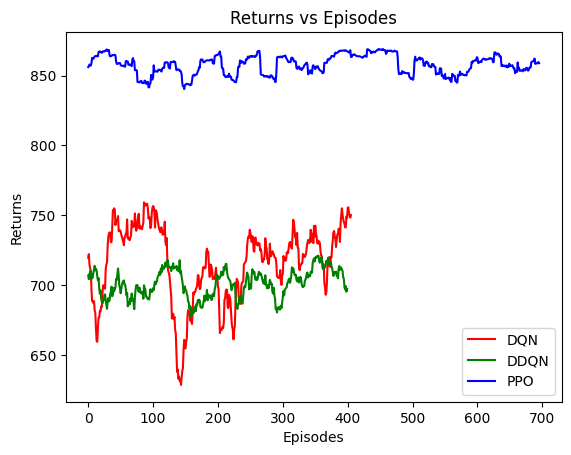

In [25]:
def rolling_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

window_size = 25  # Set the size of the rolling window

# Compute the rolling averages for DQN, DDQN, and PPO
ra_dqn_returns = rolling_average(tr_dqn_returns, window_size)
ra_ddqn_returns = rolling_average(tr_ddqn_returns, window_size)
ra_ppo_returns = rolling_average(tr_ppo_returns, window_size)

# Plot the rolling averages
plt.plot(ra_dqn_returns, 'r')
plt.plot(ra_ddqn_returns, 'g')
plt.plot(ra_ppo_returns, 'b')
plt.legend(['DQN', 'DDQN', 'PPO'])
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('Returns vs Episodes')
plt.show()

In [13]:
# plt.plot(tr_dqn_undisc_returns, 'r')
# plt.plot(tr_ddqn_undisc_returns, 'g')
# plt.plot(tr_ppo_undisc_returns, 'b')
# plt.legend(['DQN', 'DDQN', 'PPO'])
# plt.xlabel('Episodes')
# plt.ylabel("Undiscounted Returns")
# plt.title('Undiscounted Returns vs Episodes')
# plt.show()

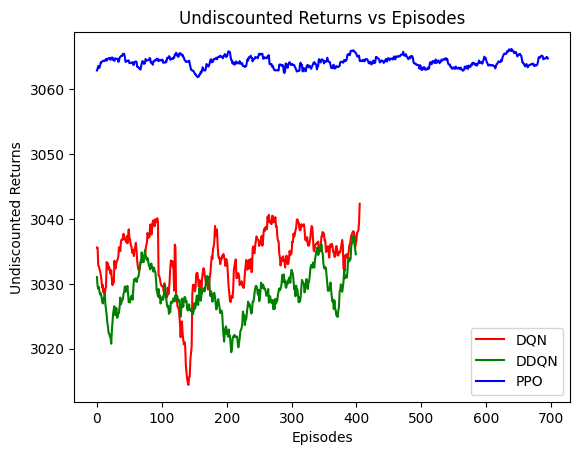

In [23]:
window_size = 25  # Set the size of the rolling window

# Compute the rolling averages for DQN, DDQN, and PPO undiscounted returns
ra_dqn_undisc_returns = rolling_average(tr_dqn_undisc_returns, window_size)
ra_ddqn_undisc_returns = rolling_average(tr_ddqn_undisc_returns, window_size)
ra_ppo_undisc_returns = rolling_average(tr_ppo_undisc_returns, window_size)

# Plot the rolling averages
plt.plot(ra_dqn_undisc_returns, 'r')
plt.plot(ra_ddqn_undisc_returns, 'g')
plt.plot(ra_ppo_undisc_returns, 'b')
plt.legend(['DQN', 'DDQN', 'PPO'])
plt.xlabel('Episodes')
plt.ylabel('Undiscounted Returns')
plt.title('Undiscounted Returns vs Episodes')
plt.show()

In [18]:
# plt.plot(step_dqn, 'r')
# plt.plot(step_ddqn, 'g')
# plt.plot(step_ppo, 'b')
# plt.legend(['DQN', 'DDQN', 'PPO'])
# plt.xlabel('Episodes')
# plt.ylabel("Steps")
# plt.title('Steps vs Episodes')
# plt.show()

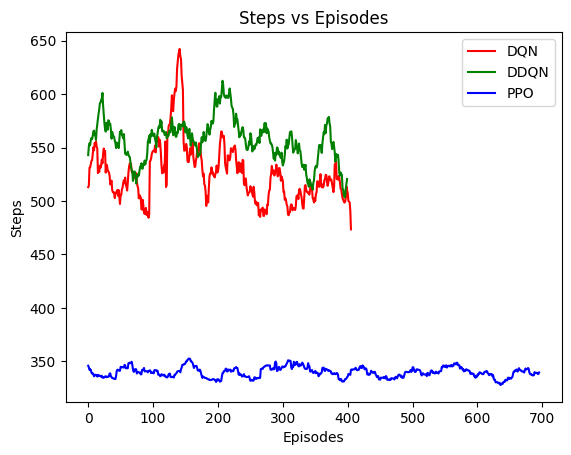

In [24]:
window_size = 25  # Set the size of the rolling window

# Compute the rolling averages for DQN, DDQN, and PPO steps
ra_step_dqn = rolling_average(step_dqn, window_size)
ra_step_ddqn = rolling_average(step_ddqn, window_size)
ra_step_ppo = rolling_average(step_ppo, window_size)

# Plot the rolling averages
plt.plot(ra_step_dqn, 'r')
plt.plot(ra_step_ddqn, 'g')
plt.plot(ra_step_ppo, 'b')
plt.legend(['DQN', 'DDQN', 'PPO'])
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('Steps vs Episodes')
plt.show()

In [19]:
print(len(step_dqn), len(step_ddqn), len(step_ppo))

430 424 720
